<!-- -*- coding: utf-8 -*- -->
Universita digli di GENOVA                               
   Graph Analytics
2018-2019 


<h1 style="color:#990000;text-align: center"> Assignement 2 : NETWORK ROBUSTNESS </h1>
    <h4 style="color:#00b00;text-align: center"> Souad BOUTANE</h4> 
   

--------------------------------------------------------

<h3 style="color:#990000">. INTRODUCTION </h3>


The aim of this homework is investigate the robustness of networks by simulating random failures and target attacks. The assignment is composed of two parts:

    >Part 1: Use synthetic graphs
    >Part 2: Use LINUX graph

In each part we will perform different types of attack, and scan the situation of graph after the attack.






In [1]:
class Attack:
    
    def __init__(self,g,attack_type="random",per=10):
        self.G=g.copy()
        self.per=per
        self.nodes_to_remove=int(per*self.G.number_of_nodes()/100)
        self.attack_type=attack_type
        
        self.nodes_list_GSCCs = []
        self.nodes_list_GWCCs = []
        self.degree_list_GWCCs = []
        self.degree_list_GSCCs = []
        self.diameter_list_GWCCs = []  
        self.deleted_nodes=[]
        self.finish_WCC=False
        self.finish_SCC=False
        
    def Attack_graph(self):
    
        #In each attack we remove per nodes until no nodes still in the graph
        
        
        for j in range(0,int(100/self.per)+1) :
            
            #print("iteration :",j,"nodes",self.G.number_of_nodes())
            
            #extract the list of WCC and SCC subgraph
            WCCs = nx.weakly_connected_component_subgraphs(self.G, copy=True)
            SCCs = nx.strongly_connected_component_subgraphs(self.G, copy=True)
            
            try:
                #extract the giant component of WCC 
                giant_WCC = max(WCCs, key=len)

                #calculate the totale degree of WCC 
                giant_WCC_degrees = sum([giant_WCC.in_degree(n)  for n in giant_WCC.nodes()])

                #calculate the totale numer of nodes of giant WCC 
                giant_WCC_nodes = giant_WCC.number_of_nodes()
            except:
                print("finish WCC")
                self.finish_WCC=True
                giant_WCC_degrees=0
                giant_WCC_nodes=0
            try:   
                #extract the giant component of SCC
                giant_SCC = max(SCCs, key=len)

                #calculate the totale degree of  SCC
                giant_SCC_degrees = sum([giant_SCC.in_degree(n)  for n in giant_SCC.nodes()])

                #calculate the totale numer of nodes of giant  SCC
                giant_SCC_nodes = giant_SCC.number_of_nodes()

                #calculate the diameter of giant SCC 
                #(diameter is only for strongly connected)
                giant_SCC_diameter = nx.diameter(giant_SCC)
                
            except:
                print("finish SCC")
                self.finish_SCC=True
                giant_SCC_degrees=0
                giant_SCC_nodes=0
                giant_SCC_diameter=0
                

            #append the measure of nodes_number wrt to this attack
            self.nodes_list_GSCCs.append(giant_SCC_nodes)
            self.nodes_list_GWCCs.append(giant_WCC_nodes)

            #append the measure of degree wrt to this attack
            self.degree_list_GWCCs.append(giant_WCC_degrees)
            self.degree_list_GSCCs.append(giant_SCC_degrees)

            #append the measure of diameter wrt to this attack
            self.diameter_list_GWCCs.append(giant_SCC_diameter)

            self.deleted_nodes.append((j)*self.per)
            
            if not self.finish_WCC and  not self.finish_SCC:
                #print("attack")
                if self.G.number_of_nodes()<self.nodes_to_remove :
                    self.nodes_to_remove=self.G.number_of_nodes()
                self.attack()
           
    def attack(self):
        if (self.attack_type=="Random"):
            self.random_attack()
        elif (self.attack_type=="Degree"):
            self.degree_attack()
        elif (self.attack_type=="Closeness"):
            self.closeness_attack()
        elif (self.attack_type=="Betweenness"):
            self.betweenness_attack()
        elif (self.attack_type=="Clustering"):
            self.clustering_attack()
        elif (self.attack_type=="PageRank"):
            self.pageRank_attack()
        else:
            print("Please specify one of these attack type: Random, Degree, Closeness, Betweenness, Clustering, PageRank")
            exit(0)
            
    def random_attack(self):
        #remove randomly "nodes_to_remove"
        for i in range(self.nodes_to_remove):
            node=random.choice(list(self.G.node.keys()))
            self.G.remove_node(node)
        
    def degree_attack(self):
        #remove the nodes with highest degree
        degrees = nx.degree_centrality(self.G)
        top_degrees = sorted(degrees.items(), reverse=True)[0:self.nodes_to_remove]
        index = [i[0] for i in top_degrees ]
        self.G.remove_nodes_from(index)
        
    
    def closeness_attack(self):
        #remove the nodes with highest closeness
        closeness=nx.closeness_centrality(self.G)  
        Top_closeness=sorted(closeness.items(),key=lambda n: n[1], reverse=True)[0:self.nodes_to_remove]
        index = [i[0] for i in Top_closeness ]
        self.G.remove_nodes_from(index)
        
        
    def betweenness_attack(self):
        #remove the nodes with highest betweenness
        betweeness=nx.betweenness_centrality(self.G) 
        Top_betweeness=sorted(betweeness.items(),key=lambda n: n[1], reverse=True)[0:self.nodes_to_remove]
        index = [i[0] for i in Top_betweeness ]
        self.G.remove_nodes_from(index)
        

    def pageRank_attack(self):
        #remove the nodes with highest clustering coefficient
        pageRank=nx.pagerank(self.G, alpha=0.85)
        Top_pageRank=sorted(pageRank.items(),key=lambda n: n[1], reverse=True)[0:self.nodes_to_remove]
        index = [i[0] for i in Top_pageRank]
        self.G.remove_nodes_from(index)
   
    def clustering_attack(self):
        #remove the nodes with highest clustering coefficient
        clustering=nx.clustering(self.G) 
        Top_clustering=sorted(clustering.items(),key=lambda n: n[1], reverse=True)[0:self.nodes_to_remove]
        index = [i[0] for i in Top_clustering]
        self.G.remove_nodes_from(index)
        
       
    def plot(self):
        #plot the effect of this attack 
        fig, ax =plt.subplots(1,3,figsize=(15,6))
        fig.subplots_adjust(wspace=.2)
        txt=self.attack_type+' Attack'
        fig.suptitle(txt, fontsize=16)
        
        #diameter measure
        ax[0].plot(self.deleted_nodes, self.diameter_list_GWCCs, 'b-', label="SCC")
        ax[0].set_ylabel("Diameter")
        ax[0].set_xlabel("percentage of nodes")
        ax[0].legend()


        #nodes measure
        ax[1].plot(self.deleted_nodes, self.nodes_list_GSCCs, 'b-', label="SCC")
        ax[1].plot(self.deleted_nodes, self.nodes_list_GWCCs, 'c-', label="WCC")
        ax[1].set_ylabel("number of nodes")
        ax[1].set_xlabel("percentage of nodes")
        ax[1].legend()
        
        ax[2].plot(self.deleted_nodes, self.degree_list_GSCCs, 'b-',label="SCC")
        ax[2].plot(self.deleted_nodes, self.degree_list_GWCCs, 'c-',label="WCC")
        ax[2].set_ylabel("Degree")
        ax[2].set_xlabel("percentage of nodes")
        ax[2].legend()
        

        plt.show()
        

<h3 style="color:#990000">Part 1: Use synthetic graphs</h3> 

In the first part, we will use a graph provided by Networx library , which is :


In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

#load the data
G_synthetic = nx.scale_free_graph(3000)
#G_synthetic=nx.gnc_graph(300, create_using=nx.DiGraph())
nx.draw(G_synthetic)
plt.show()

<Figure size 640x480 with 1 Axes>

<h5 style="color:#2E8B57">Attack 1: Turn off nodes at random </h5>

finish WCC
finish SCC


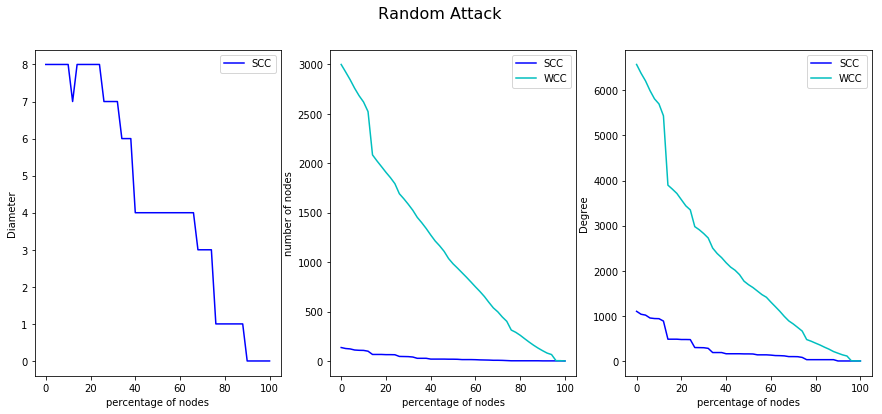

In [4]:
random_sy= Attack(G_synthetic,"Random",2)
random_sy.Attack_graph()
random_sy.plot()

<span style="color:#20B2AA"> Our synthetic graph display a high tolerance of random attack, the diameter still const until the failure of 16% ~f' of the totalte number of network. after f' the diameter starts to decrease/increase because some nodes of SCC are deleted. then return to const value since other nodes outside of SCC are removed. the graph failed totaly after the distruction of its SCC in the point 90% </span>

<span style="color:#20B2AA"> This scale graph has a good tolerance of random failure </span>

<h5 style="color:#2E8B57">Attack 2: Turn off the highest degree nodes</h5>

finish WCC
finish SCC


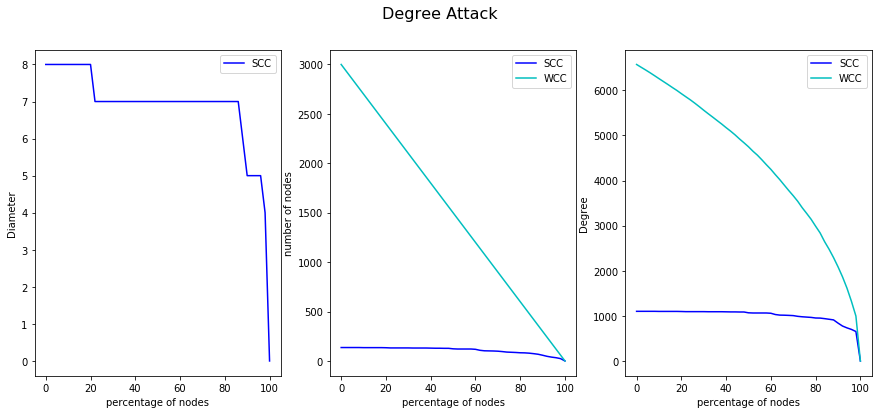

In [5]:
Degree_sy= Attack(G_synthetic,"Degree",2)
Degree_sy.Attack_graph()
Degree_sy.plot()

<span style="color:#20B2AA">Most of the highest degree nodes does not belong to SCC, which explains the fact of diameter stability until the point 90%, after this point the SCC starts a quick failure.</span>

<span style="color:#20B2AA"> This scale graph has a good tolerance of high degree attack </span>

<h5 style="color:#2E8B57">Attack 3: Turn off the highest pagerank nodes</h5> 

In [5]:
#pageRank_sy= Attack(G_synthetic,"PageRank",10)
#pageRank_sy.Attack_graph()
#pageRank_sy.plot()

<h5 style="color:#2E8B57">Attack 4: Turn off the highest clustering coefficient nodes </h5> 

In [6]:
#clustering_sy= Attack(G_synthetic,"Clustering",10)
#clustering_sy.Attack_graph()
#clustering_sy.plot()

<h5 style="color:#2E8B57">Attack 5: Turn off the highest betweenness coefficient nodes </h5> 

finish WCC
finish SCC


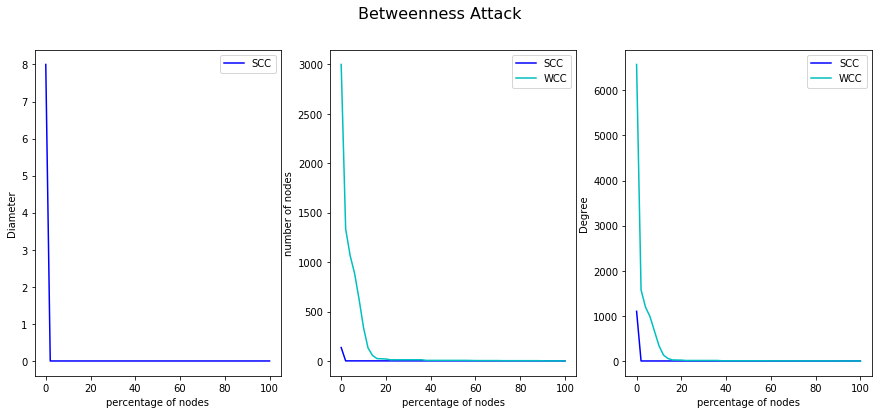

In [6]:
betweenness_sy= Attack(G_synthetic,"Betweenness",2)
betweenness_sy.Attack_graph()
betweenness_sy.plot()

<span style="color:#20B2AA"> This scale graph are extremely vulnerable to hight betweeness attack, it is destroyed in the first attack. </span>

<h5 style="color:#2E8B57">Attack 6: Turn off the highest clooseness coefficient nodes </h5> 

finish WCC
finish SCC


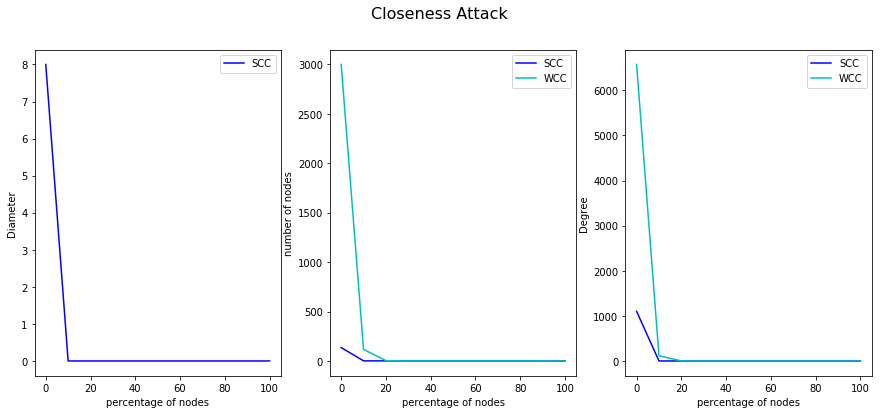

In [7]:
closeness_sy= Attack(G_synthetic,"Closeness",10)
closeness_sy.Attack_graph()
closeness_sy.plot()

<span style="color:#20B2AA"> This scale graph are extremely vulnerable to hight closeness attack, it is destroyed in the first attack. </span>

<h5 style="color:#2E8B57"> What is the perfect attack on a specific measure ??</h5> 

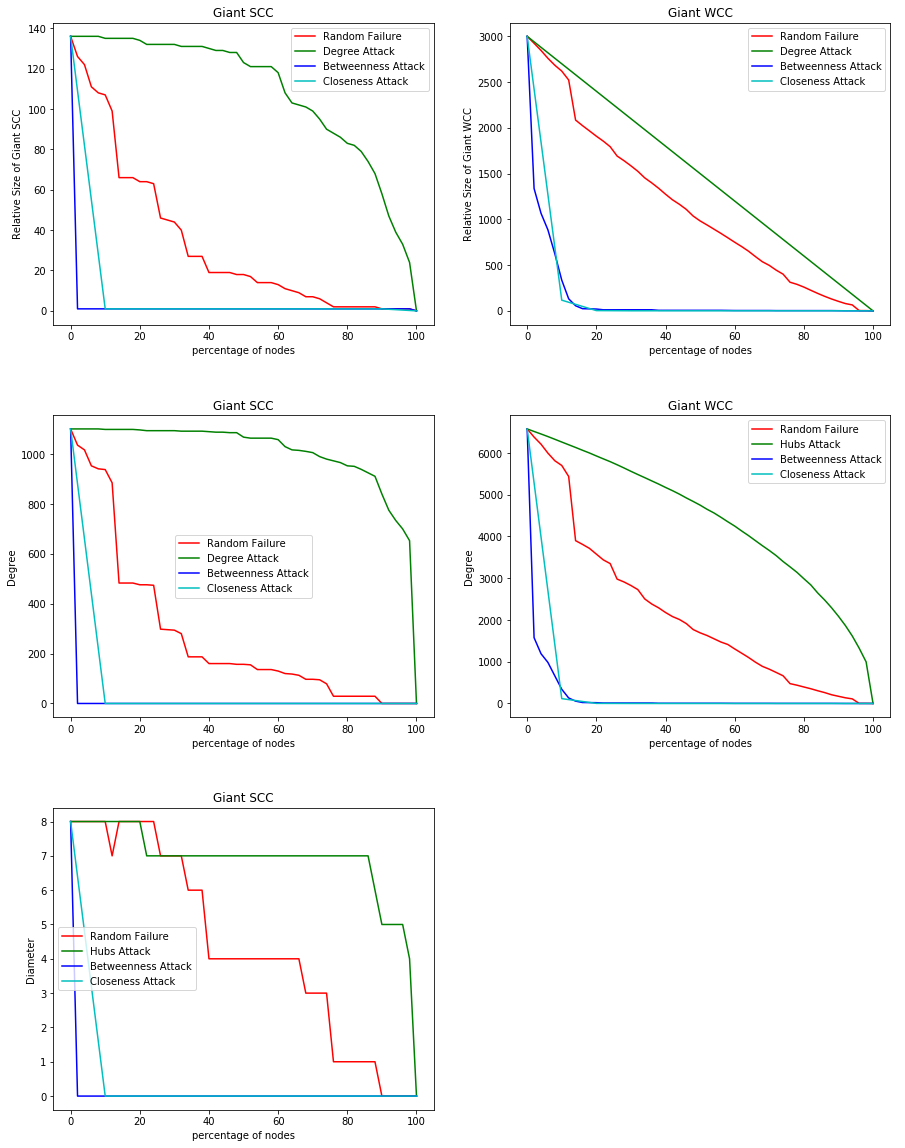

In [8]:
#plot the effect of this attack 
fig, ax =plt.subplots(3,2,figsize=(15,20))
fig.subplots_adjust(hspace=.3)
       
#------------------------------------Relative Size of Giant SCC
#SCC
ax[0][0].plot(random_sy.deleted_nodes, random_sy.nodes_list_GSCCs, 'r-', label="Random Failure")
ax[0][0].plot(Degree_sy.deleted_nodes, Degree_sy.nodes_list_GSCCs, 'g-', label="Degree Attack")
#ax[0][0].plot(pageRank_sy.deleted_nodes, pageRank_sy.nodes_list_GSCCs, 'p-', label="PageRank Attack")
#ax[0][0].plot(clustering_sy.deleted_nodes, clustering_sy.nodes_list_GSCCs, 'h-', label="Clustering Attack")
ax[0][0].plot(betweenness_sy.deleted_nodes, betweenness_sy.nodes_list_GSCCs, 'b-', label="Betweenness Attack")
ax[0][0].plot(closeness_sy.deleted_nodes, closeness_sy.nodes_list_GSCCs, 'c-', label="Closeness Attack")

ax[0][0].set_title("Giant SCC")
ax[0][0].set_ylabel("Relative Size of Giant SCC")
ax[0][0].set_xlabel("percentage of nodes")
ax[0][0].legend()

#WCC
ax[0][1].plot(random_sy.deleted_nodes, random_sy.nodes_list_GWCCs, 'r-', label="Random Failure")
ax[0][1].plot(Degree_sy.deleted_nodes, Degree_sy.nodes_list_GWCCs, 'g-', label="Degree Attack")
#ax[0][1].plot(pageRank_sy.deleted_nodes, pageRank_sy.nodes_list_GWCCs, 'p-', label="PageRank Attack")
#ax[0][1].plot(clustering_sy.deleted_nodes, clustering_sy.nodes_list_GWCCs, 'h-', label="Clustering Attack")
ax[0][1].plot(betweenness_sy.deleted_nodes, betweenness_sy.nodes_list_GWCCs, 'b-', label="Betweenness Attack")
ax[0][1].plot(closeness_sy.deleted_nodes, closeness_sy.nodes_list_GWCCs, 'c-', label="Closeness Attack")

ax[0][1].set_title("Giant WCC")
ax[0][1].set_ylabel("Relative Size of Giant WCC")
ax[0][1].set_xlabel("percentage of nodes")
ax[0][1].legend()

#------------------------------------Degree measure
#SCC
ax[1][0].plot(random_sy.deleted_nodes, random_sy.degree_list_GSCCs, 'r-', label="Random Failure")
ax[1][0].plot(Degree_sy.deleted_nodes, Degree_sy.degree_list_GSCCs, 'g-', label="Degree Attack")
#ax[1][0].plot(pageRank_sy.deleted_nodes, pageRank_sy.degree_list_GSCCs, 'p-', label="PageRank Attack")
#ax[1][0].plot(clustering_sy.deleted_nodes, clustering_sy.degree_list_GSCCs, 'h-', label="Clustering Attack")
ax[1][0].plot(betweenness_sy.deleted_nodes, betweenness_sy.degree_list_GSCCs, 'b-', label="Betweenness Attack")
ax[1][0].plot(closeness_sy.deleted_nodes, closeness_sy.degree_list_GSCCs, 'c-', label="Closeness Attack")

ax[1][0].set_title("Giant SCC")
ax[1][0].set_ylabel("Degree")
ax[1][0].set_xlabel("percentage of nodes")
ax[1][0].legend()

#WCC
ax[1][1].plot(random_sy.deleted_nodes, random_sy.degree_list_GWCCs, 'r-', label="Random Failure")
ax[1][1].plot(Degree_sy.deleted_nodes, Degree_sy.degree_list_GWCCs, 'g-', label="Hubs Attack")
#ax[1][1].plot(pageRank_sy.deleted_nodes, pageRank_sy.ndegree_list_GWCCs, 'p-', label="PageRank Attack")
#ax[1][1].plot(clustering_sy.deleted_nodes, clustering_sy.degree_list_GWCCs, 'h-', label="Clustering Attack")
ax[1][1].plot(betweenness_sy.deleted_nodes, betweenness_sy.degree_list_GWCCs, 'b-', label="Betweenness Attack")
ax[1][1].plot(closeness_sy.deleted_nodes, closeness_sy.degree_list_GWCCs, 'c-', label="Closeness Attack")

ax[1][1].set_title("Giant WCC")
ax[1][1].set_ylabel("Degree")
ax[1][1].set_xlabel("percentage of nodes")
ax[1][1].legend()


#------------------------Diametre mesure
#SCC
ax[2][0].plot(random_sy.deleted_nodes, random_sy.diameter_list_GWCCs, 'r-', label="Random Failure")
ax[2][0].plot(Degree_sy.deleted_nodes, Degree_sy.diameter_list_GWCCs, 'g-', label="Hubs Attack")
#ax[2][0].plot(pageRank_sy.deleted_nodes, pageRank_sy.diameter_list_GWCCs, 'p-', label="PageRank Attack")
#ax[2][0].plot(clustering_sy.deleted_nodes, clustering_sy.diameter_list_GWCCs, 'h-', label="Clustering Attack")
ax[2][0].plot(betweenness_sy.deleted_nodes, betweenness_sy.diameter_list_GWCCs, 'b-', label="Betweenness Attack")
ax[2][0].plot(closeness_sy.deleted_nodes, closeness_sy.diameter_list_GWCCs, 'c-', label="Closeness Attack")

ax[2][0].set_title("Giant SCC")
ax[2][0].set_ylabel("Diameter")
ax[2][0].set_xlabel("percentage of nodes")
ax[2][0].legend()

ax[2][1].axis('off')

plt.show()




<span style="color:#20B2AA"> This scale graph are extremely vulnerable to hight closeness and betweeness attack, and it has a high tolerance for the other attack like randomly and heigh degree attack. </span>

<h3 style="color:#990000">Part 2: Use LINUX graph </h3> 

- To analyse the graph, we will compute in each step some metrics and interpret them, most of the metric will be computed twice one for in links and other for out links. 


<h4 style="color:#2E8B57">1. Number of edges and node </h4>

In [9]:
G_linux=nx.read_edgelist('data/out.csv','%', nodetype=int,delimiter=";", create_using=nx.DiGraph())

<h5 style="color:#2E8B57">Attack 1: Turn off nodes at random </h5>

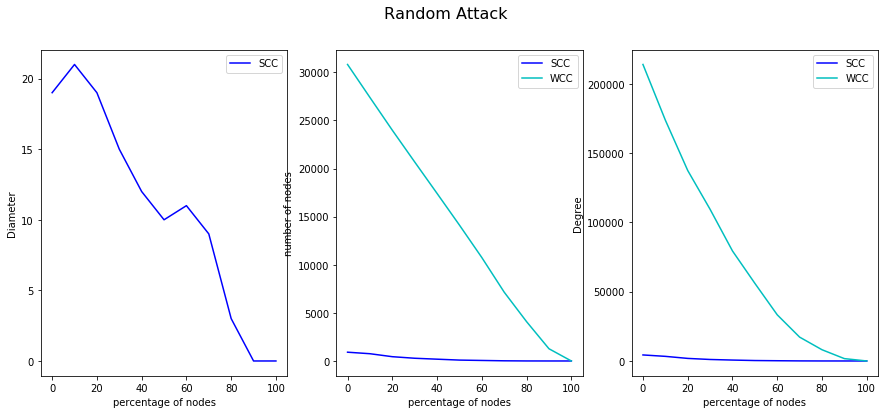

In [10]:
random_lx= Attack(G_linux,"Random",10)
random_lx.Attack_graph()
random_lx.plot()

<h5 style="color:#2E8B57">Attack 2: Turn off the highest degree nodes</h5>

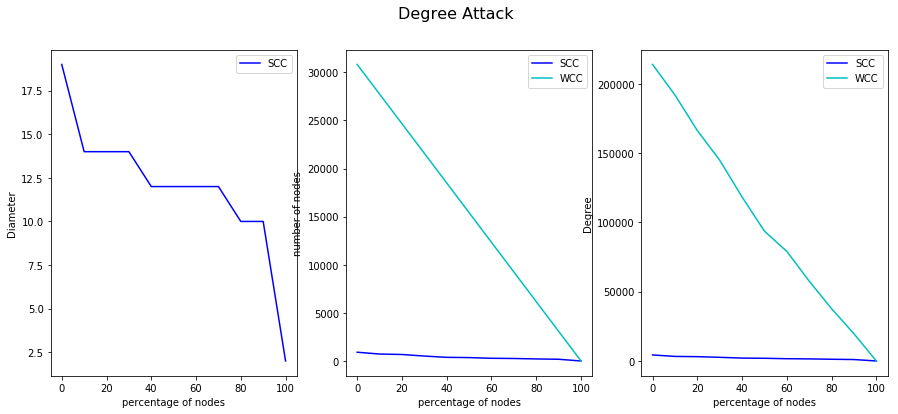

In [11]:
Degree_lx= Attack(G_linux,"Degree",10)
Degree_lx.Attack_graph()
Degree_lx.plot()

<h5 style="color:#2E8B57">Attack 3: Turn off the highest pagerank nodes</h5> 

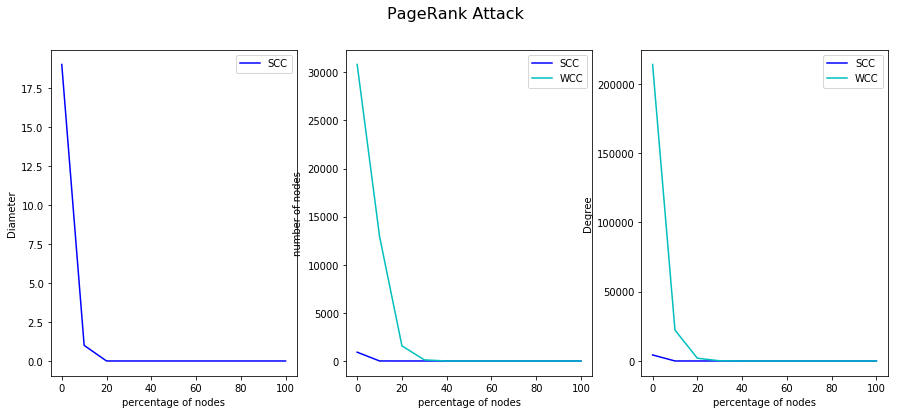

In [12]:
pageRank_lx= Attack(G_linux,"PageRank",10)
pageRank_lx.Attack_graph()
pageRank_lx.plot()

<h5 style="color:#2E8B57">Attack 4: Turn off the highest clustering coefficient nodes </h5> 

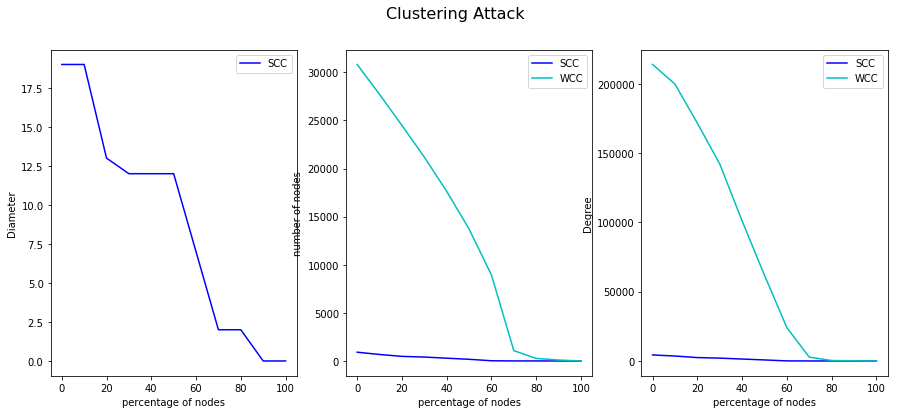

In [13]:
clustering_lx= Attack(G_linux,"Clustering",10)
clustering_lx.Attack_graph()
clustering_lx.plot()

<h5 style="color:#2E8B57">Attack 5: Turn off the highest betweenness coefficient nodes </h5> 

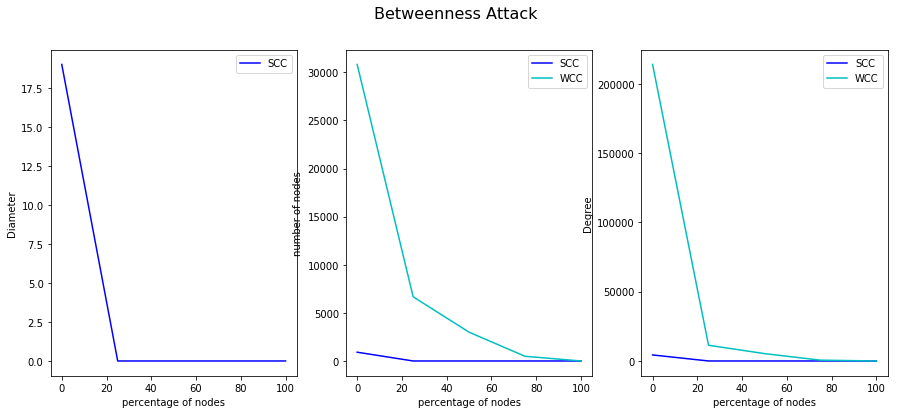

In [14]:
betweenness_lx= Attack(G_linux,"Betweenness",25)
betweenness_lx.Attack_graph()
betweenness_lx.plot()

<h5 style="color:#2E8B57">Attack 6: Turn off the highest clooseness coefficient nodes </h5> 

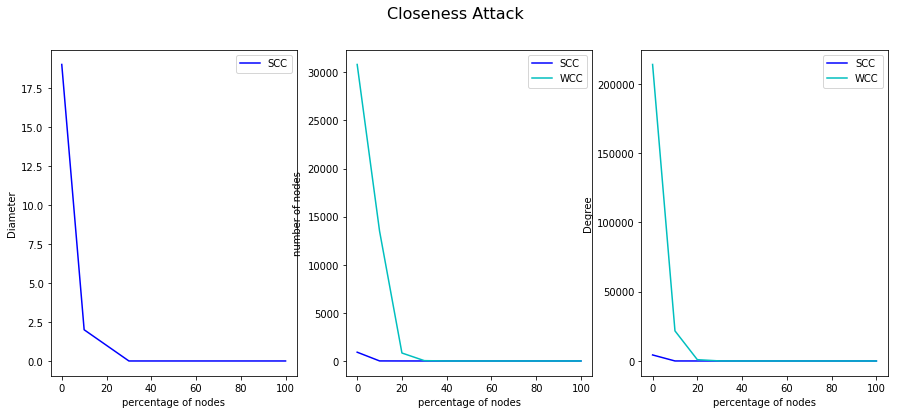

In [15]:
closeness_lx= Attack(G_linux,"Closeness",10)
closeness_lx.Attack_graph()
closeness_lx.plot()

<h5 style="color:#2E8B57"> What is the perfect attack on a specific measure ??</h5> 

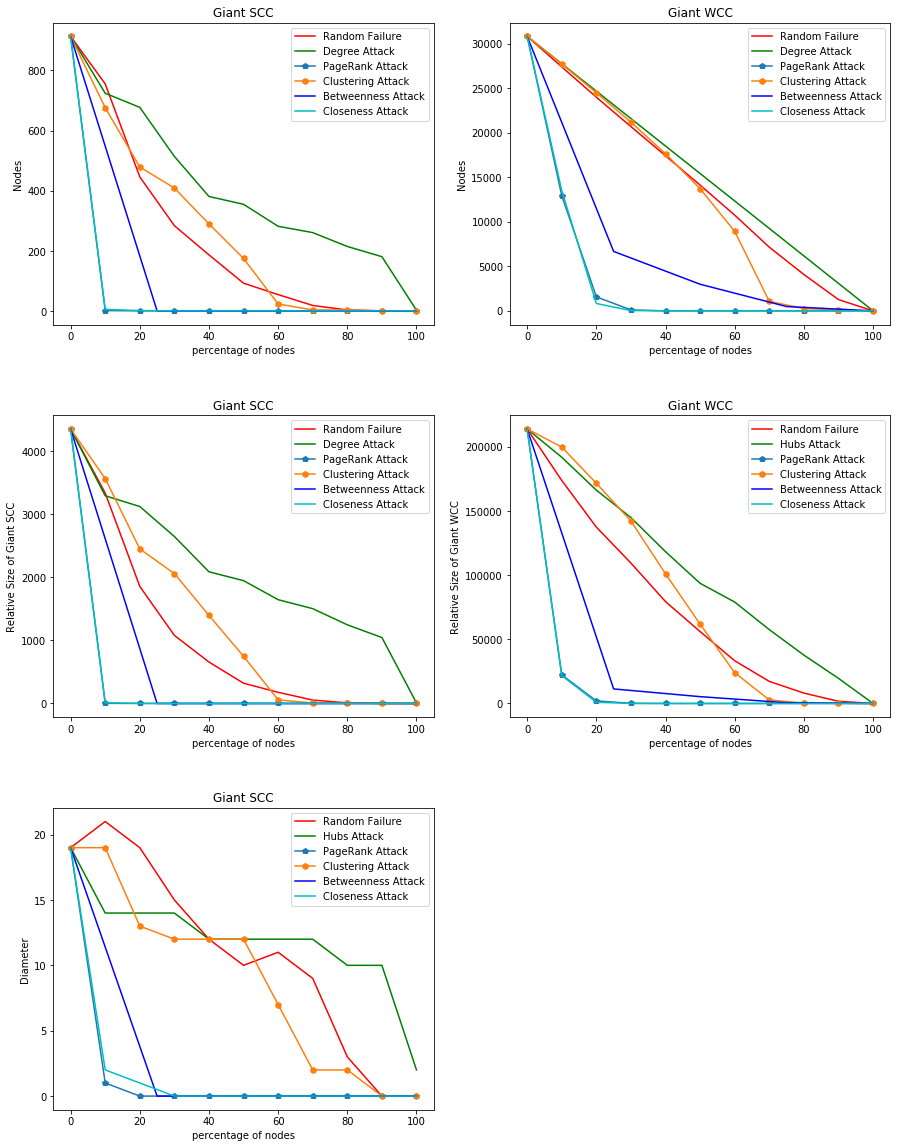

In [17]:
#plot the effect of this attack 
fig, ax =plt.subplots(3,2,figsize=(15,20))
fig.subplots_adjust(hspace=.3)
       
#------------------------------------Nodes measure
#SCC
ax[0][0].plot(random_lx.deleted_nodes, random_lx.nodes_list_GSCCs, 'r-', label="Random Failure")
ax[0][0].plot(Degree_lx.deleted_nodes, Degree_lx.nodes_list_GSCCs, 'g-', label="Degree Attack")
ax[0][0].plot(pageRank_lx.deleted_nodes, pageRank_lx.nodes_list_GSCCs, 'p-', label="PageRank Attack")
ax[0][0].plot(clustering_lx.deleted_nodes, clustering_lx.nodes_list_GSCCs, 'h-', label="Clustering Attack")
ax[0][0].plot(betweenness_lx.deleted_nodes, betweenness_lx.nodes_list_GSCCs, 'b-', label="Betweenness Attack")
ax[0][0].plot(closeness_lx.deleted_nodes, closeness_lx.nodes_list_GSCCs, 'c-', label="Closeness Attack")

ax[0][0].set_title("Giant SCC")
ax[0][0].set_ylabel("Nodes")
ax[0][0].set_xlabel("percentage of nodes")
ax[0][0].legend()

#WCC
ax[0][1].plot(random_lx.deleted_nodes, random_lx.nodes_list_GWCCs, 'r-', label="Random Failure")
ax[0][1].plot(Degree_lx.deleted_nodes, Degree_lx.nodes_list_GWCCs, 'g-', label="Degree Attack")
ax[0][1].plot(pageRank_lx.deleted_nodes, pageRank_lx.nodes_list_GWCCs, 'p-', label="PageRank Attack")
ax[0][1].plot(clustering_lx.deleted_nodes, clustering_lx.nodes_list_GWCCs, 'h-', label="Clustering Attack")
ax[0][1].plot(betweenness_lx.deleted_nodes, betweenness_lx.nodes_list_GWCCs, 'b-', label="Betweenness Attack")
ax[0][1].plot(closeness_lx.deleted_nodes, closeness_lx.nodes_list_GWCCs, 'c-', label="Closeness Attack")

ax[0][1].set_title("Giant WCC")
ax[0][1].set_ylabel("Nodes")
ax[0][1].set_xlabel("percentage of nodes")
ax[0][1].legend()

#------------------------------------Relative Size measure
#SCC
ax[1][0].plot(random_lx.deleted_nodes, random_lx.degree_list_GSCCs, 'r-', label="Random Failure")
ax[1][0].plot(Degree_lx.deleted_nodes, Degree_lx.degree_list_GSCCs, 'g-', label="Degree Attack")
ax[1][0].plot(pageRank_lx.deleted_nodes, pageRank_lx.degree_list_GSCCs, 'p-', label="PageRank Attack")
ax[1][0].plot(clustering_lx.deleted_nodes, clustering_lx.degree_list_GSCCs, 'h-', label="Clustering Attack")
ax[1][0].plot(betweenness_lx.deleted_nodes, betweenness_lx.degree_list_GSCCs, 'b-', label="Betweenness Attack")
ax[1][0].plot(closeness_lx.deleted_nodes, closeness_lx.degree_list_GSCCs, 'c-', label="Closeness Attack")

ax[1][0].set_title("Giant SCC")
ax[1][0].set_ylabel("Relative Size of Giant SCC")
ax[1][0].set_xlabel("percentage of nodes")
ax[1][0].legend()

#WCC
ax[1][1].plot(random_lx.deleted_nodes, random_lx.degree_list_GWCCs, 'r-', label="Random Failure")
ax[1][1].plot(Degree_lx.deleted_nodes, Degree_lx.degree_list_GWCCs, 'g-', label="Hubs Attack")
ax[1][1].plot(pageRank_lx.deleted_nodes, pageRank_lx.degree_list_GWCCs, 'p-', label="PageRank Attack")
ax[1][1].plot(clustering_lx.deleted_nodes, clustering_lx.degree_list_GWCCs, 'h-', label="Clustering Attack")
ax[1][1].plot(betweenness_lx.deleted_nodes, betweenness_lx.degree_list_GWCCs, 'b-', label="Betweenness Attack")
ax[1][1].plot(closeness_lx.deleted_nodes, closeness_lx.degree_list_GWCCs, 'c-', label="Closeness Attack")

ax[1][1].set_title("Giant WCC")
ax[1][1].set_ylabel("Relative Size of Giant WCC")
ax[1][1].set_xlabel("percentage of nodes")
ax[1][1].legend()


#------------------------Diametre mesure
#SCC
ax[2][0].plot(random_lx.deleted_nodes, random_lx.diameter_list_GWCCs, 'r-', label="Random Failure")
ax[2][0].plot(Degree_lx.deleted_nodes, Degree_lx.diameter_list_GWCCs, 'g-', label="Hubs Attack")
ax[2][0].plot(pageRank_lx.deleted_nodes, pageRank_lx.diameter_list_GWCCs, 'p-', label="PageRank Attack")
ax[2][0].plot(clustering_lx.deleted_nodes, clustering_lx.diameter_list_GWCCs, 'h-', label="Clustering Attack")
ax[2][0].plot(betweenness_lx.deleted_nodes, betweenness_lx.diameter_list_GWCCs, 'b-', label="Betweenness Attack")
ax[2][0].plot(closeness_lx.deleted_nodes, closeness_lx.diameter_list_GWCCs, 'c-', label="Closeness Attack")

ax[2][0].set_title("Giant SCC")
ax[2][0].set_ylabel("Diameter")
ax[2][0].set_xlabel("percentage of nodes")
ax[2][0].legend()

ax[2][1].axis('off')

plt.show()




<span style="color:#20B2AA">Linux graph  are extremely vulnerable to hight closeness, pageRank and betweeness attack, and it has a good tolerance for the other attack like randomly and heigh degree and clustering attack. </span>